In [5]:
pip install mlxtend --upgrade

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install mlxtend --user

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install preprocessing

     ---------------------------------------- 0.0/349.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/349.6 kB ? eta -:--:--
     ---------------- --------------------- 153.6/349.6 kB 1.8 MB/s eta 0:00:01
     --------------------------------- ---- 307.2/349.6 kB 2.7 MB/s eta 0:00:01
     -------------------------------------  348.2/349.6 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 349.6/349.6 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     ------------ --------------------------- 0.4/1.2 MB 7.4 MB/s eta 0:00:01
     ------------------------------- -------- 0.9/1.2 MB 9.7 MB/s eta 0:00:01
     ---------------------------------------- 1.2/1.2 MB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ------------- -------------------------- 0.5/1.4 M

In [7]:
import pandas as pd
import numpy
#from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

In [8]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [39]:
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
print (df)           
 
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print (frequent_itemsets)
 
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
print (rules)

   Apple   Corn   Dill   Eggs  Ice cream  Kidney Beans   Milk  Nutmeg  Onion  \
0  False  False  False   True      False          True   True    True   True   
1  False  False   True   True      False          True  False    True   True   
2   True  False  False   True      False          True   True   False  False   
3  False   True  False  False      False          True   True   False  False   
4  False   True  False   True       True          True  False   False   True   

   Unicorn  Yogurt  
0    False    True  
1    False    True  
2    False   False  
3     True    True  
4    False   False  
    support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Kidney Beans, Eggs)
6       0.6                (Eggs, Onion)
7       0.6         (Kidney Beans, Milk)
8       0.6        (Kidn

In [11]:
support=rules['support'].values
confidence=rules['confidence'].values

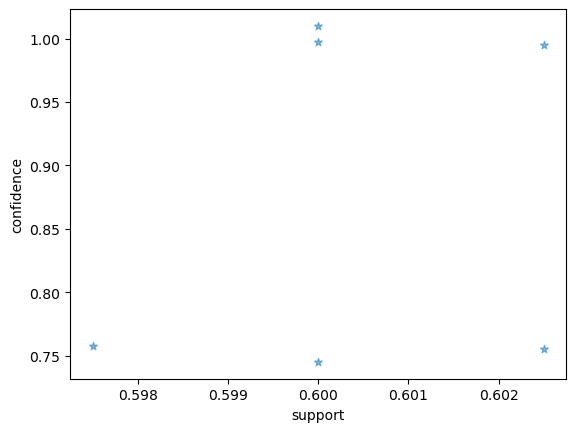

In [12]:
import random
import matplotlib.pyplot as plt
 
 
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [23]:
pip install networkx

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
    --------------------------------------- 0.0/1.6 MB 667.8 kB/s eta 0:00:03
   -------- ------------------------------- 0.4/1.6 MB 4.5 MB/s eta 0:00:01
   ------------------- -------------------- 0.8/1.6 MB 5.8 MB/s eta 0:00:01
   --------------------------------- ------ 1.4/1.6 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 7.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [33]:
import networkx as nx 
import random as ra
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

In [86]:
def draw_graph(rules, rules_to_show):
     import networkx as nx 
     import random as ra
     import numpy as np
     G1 = nx.DiGraph()
   
     color_map=[]
     N = 100
     colors = np.random.rand(N)
     strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
     
     
     for i in range (rules_to_show):      
          G1.add_nodes_from(["R"+str(i)])
     
          
          for a in rules.iloc[i]['antecedents']:
                         
               G1.add_nodes_from([a])
               
               G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
               
          for c in rules.iloc[i]['consequents']:
                    
               G1.add_nodes_from([c])
               
               G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
     
     for node in G1:
          found_a_string = False
          for item in strs: 
               if node==item:
                    found_a_string = True
          if found_a_string:
               color_map.append('yellow')
          else:
               color_map.append('green')       
     
     
     
     edges = G1.edges()
     print (edges)
     colors = [G1[u][v]['color'] for u,v in edges]
     print(colors)
     weights = [G1[u][v]['weight'] for u,v in edges]
     print(weights)
     
     pos = nx.spring_layout(G1, k=16, scale=1)
     #nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
     nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False) 
     for p in pos:  # raise text positions
          pos[p][1] += 0.07
     nx.draw_networkx_labels(G1, pos)
     plt.show()   

             antecedents            consequents  antecedent support  \
0                 (Eggs)                (Onion)                 0.8   
1                (Onion)                 (Eggs)                 0.6   
2   (Kidney Beans, Eggs)                (Onion)                 0.8   
3  (Kidney Beans, Onion)                 (Eggs)                 0.6   
4                 (Eggs)  (Kidney Beans, Onion)                 0.8   
5                (Onion)   (Kidney Beans, Eggs)                 0.6   

   consequent support  support  confidence  lift  leverage  conviction  \
0                 0.6      0.6        0.75  1.25      0.12         1.6   
1                 0.8      0.6        1.00  1.25      0.12         inf   
2                 0.6      0.6        0.75  1.25      0.12         1.6   
3                 0.8      0.6        1.00  1.25      0.12         inf   
4                 0.6      0.6        0.75  1.25      0.12         1.6   
5                 0.8      0.6        1.00  1.25      0.12

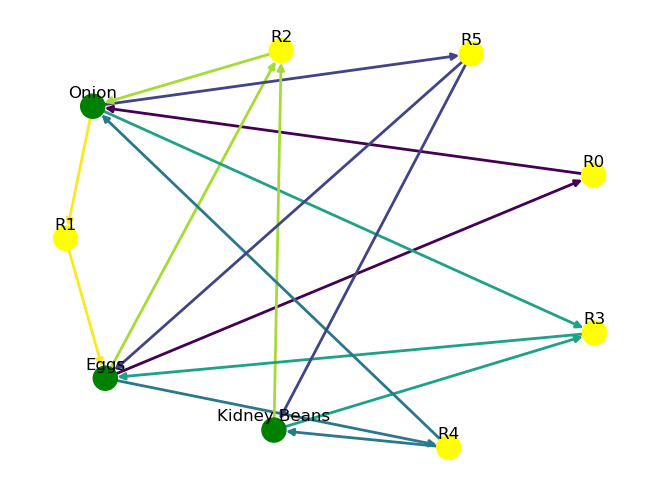

In [87]:
print(rules)
draw_graph(rules, 6)

In [53]:
G = nx.DiGraph()
G.add_edge('A', 'B', weight=1, title='ab', subtitle='testing')
edge_labels = nx.get_edge_attributes(G, 'title')
print(edge_labels)

{('A', 'B'): 'ab'}


{('A', 'B'): 'ab'}


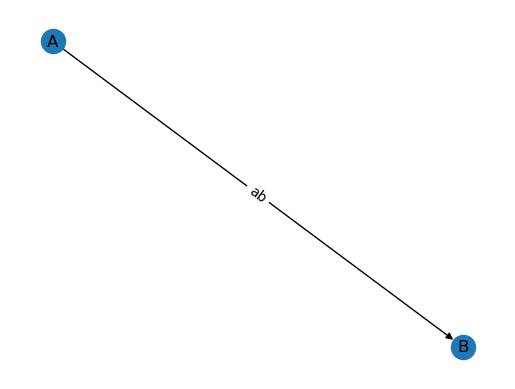

In [54]:
G = nx.DiGraph()
G.add_edge('A', 'B', weight=1, title='ab', subtitle='testing')
edge_labels = nx.get_edge_attributes(G, 'title')
print(edge_labels)

fig = plt.figure()
ax1 = plt.subplot2grid((1, 1), (0, 0))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

In [33]:
pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     ---- ---------------------------------- 30.7/250.0 kB 1.3 MB/s eta 0:00:01
     -------------------------- ----------- 174.1/250.0 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


   Apple   Corn   Dill   Eggs  Ice cream  Kidney Beans   Milk  Nutmeg  Onion  \
0  False  False  False   True      False          True   True    True   True   
1  False  False   True   True      False          True  False    True   True   
2   True  False  False   True      False          True   True   False  False   
3  False   True  False  False      False          True   True   False  False   
4  False   True  False   True       True          True  False   False   True   

   Unicorn  Yogurt  
0    False    True  
1    False    True  
2    False   False  
3     True    True  
4    False   False  
    support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Eggs, Kidney Beans)
6       0.6                (Eggs, Onion)
7       0.6         (Milk, Kidney Beans)
8       0.6        (Kidn

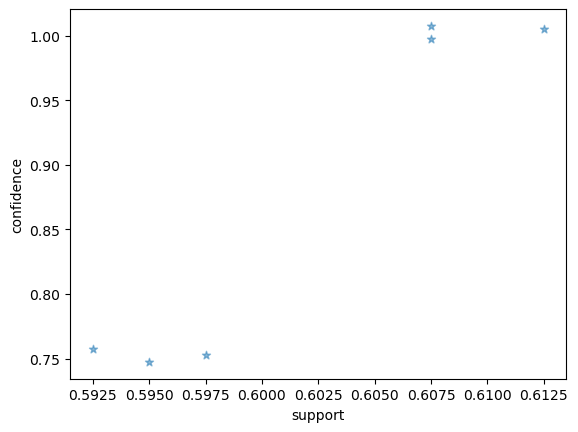

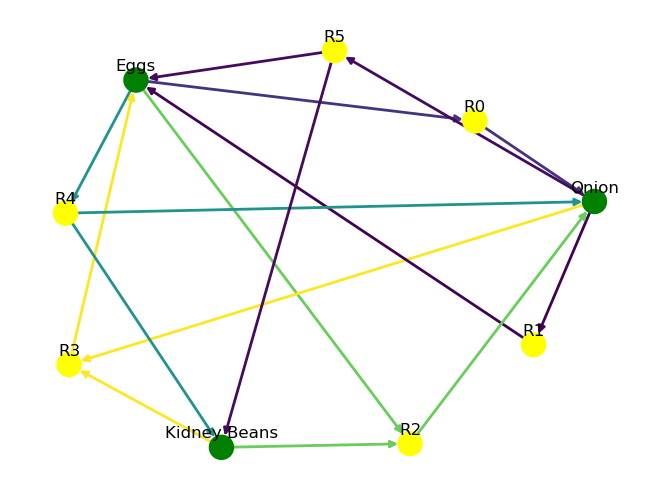

In [ ]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]
            
            
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
 
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
print (df)           
 
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print (frequent_itemsets)
 
from mlxtend.frequent_patterns import association_rules
 
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
print (rules)
 
support=rules['support'].values
confidence=rules['confidence'].values
 
 
import random
import matplotlib.pyplot as plt
 
 
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()
 
import numpy as np
 
def draw_graph(rules, rules_to_show):
  import networkx as nx  
  G1 = nx.DiGraph()
   
  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
  for i in range (rules_to_show):      
    G1.add_nodes_from(["R"+str(i)])
    
     
    for a in rules.iloc[i]['antecedents']:
                
        G1.add_nodes_from([a])
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in rules.iloc[i]['consequents']:
             
            G1.add_nodes_from([c])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')       
 
 
   
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()
 
     
draw_graph (rules, 6)   
 
 
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
 
 
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
 
basket = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
 
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
 
basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)
 
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
 
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()
 
print (rules)
 
 
 
support=rules['support'].values
confidence=rules['confidence'].values
 
import seaborn as sns1
 
for i in range (len(support)):
    support[i] = support[i] 
    confidence[i] = confidence[i] 
     
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')    
sns1.regplot(x=support, y=confidence, fit_reg=False)
 
plt.gcf().clear()
draw_graph (rules, 10)  